In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize

In [3]:
# import dataset
univ=pd.read_csv(r"C:\Users\sidra\Downloads\Universities.csv")
univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [4]:
univ2=univ.iloc[:,1:]
univ2

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88
4,1280,83,33,13,21864,90
5,1340,89,23,10,32162,95
6,1315,90,30,12,31585,95
7,1255,74,24,12,20126,92
8,1400,91,14,11,39525,97
9,1305,75,44,7,58691,87


In [5]:
# Normalize heterogenous numerical data using standard scalar fit transform to dataset
univ_norm=pd.DataFrame(normalize(univ2),columns=univ2.columns)
univ_norm

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.057602,0.003913,0.000967,0.000572,0.998323,0.004133
1,0.022252,0.001573,0.000393,0.000094,0.999750,0.001274
2,0.050283,0.002474,0.002355,0.000359,0.998725,0.002873
3,0.041538,0.002410,0.000761,0.000381,0.999130,0.002790
4,0.058443,0.003790,0.001507,0.000594,0.998274,0.004109
5,0.041628,0.002765,0.000715,0.000311,0.999125,0.002951
6,0.041597,0.002847,0.000949,0.000380,0.999125,0.003005
7,0.062235,0.003670,0.001190,0.000595,0.998043,0.004562
8,0.035398,0.002301,0.000354,0.000278,0.999368,0.002453
9,0.022230,0.001278,0.000750,0.000119,0.999751,0.001482


In [6]:
# Use Elbow Graph to find optimum number of  clusters (K value) from K values range
# The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion WCSS 
# random state can be anything from 0 to 42, but the same number to be used everytime,so that the results don't change. 

In [6]:
# within-cluster sum-of-squares criterion 
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=1)  
    kmeans.fit(univ_norm)
    wcss.append(kmeans.inertia_)

C:\Users\sidra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sidra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sidra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sidra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

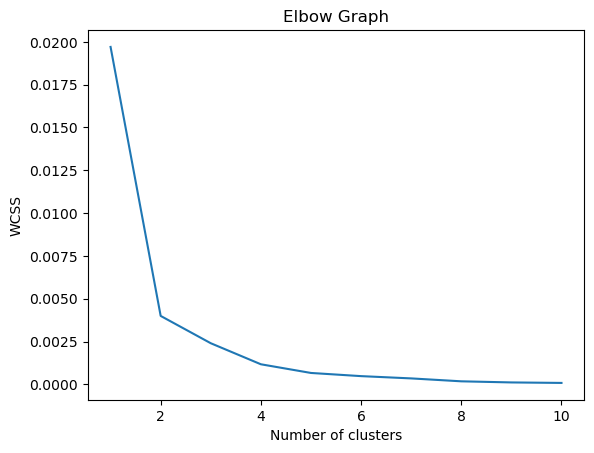

In [7]:
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Build Cluster algorithm using K=2

In [20]:
# Cluster algorithm using K=2
clusters4=KMeans(2,random_state=42).fit(univ_norm)
clusters4

C:\Users\sidra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sidra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [21]:
clusters4.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0])

In [22]:
# Assign clusters to the data set
univ4=univ.copy()
univ4['clusters4id']=clusters4.labels_
univ4

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusters4id
0,Brown,1310,89,22,13,22704,94,0
1,CalTech,1415,100,25,6,63575,81,0
2,CMU,1260,62,59,9,25026,72,0
3,Columbia,1310,76,24,12,31510,88,0
4,Cornell,1280,83,33,13,21864,90,0
5,Dartmouth,1340,89,23,10,32162,95,0
6,Duke,1315,90,30,12,31585,95,0
7,Georgetown,1255,74,24,12,20126,92,0
8,Harvard,1400,91,14,11,39525,97,0
9,JohnsHopkins,1305,75,44,7,58691,87,0


In [23]:
# Compute the centroids for K=2 clusters with 6 variables
clusters4.cluster_centers_

array([[4.18894012e-02, 2.66183293e-03, 9.55476475e-04, 3.49623557e-04,
        9.99052417e-01, 2.87256759e-03],
       [9.51447674e-02, 4.65626043e-03, 5.20470164e-03, 1.50019912e-03,
        9.95296600e-01, 6.58079819e-03]])

In [24]:
# Group data by Clusters (K=2)
univ4.groupby('clusters4id').agg(['mean']).reset_index()

C:\Users\sidra\AppData\Local\Temp\ipykernel_19152\3488596278.py:2: FutureWarning: ['Univ'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  univ4.groupby('clusters4id').agg(['mean']).reset_index()


,clusters4id,SAT,Top10,Accept,SFRatio,Expenses,GradRate
,,mean,mean,mean,mean,mean,mean
0,0,1324.411765,84.647059,29.764706,10.647059,34459.235294,90.117647
1,1,1143.250000,59.125000,59.250000,17.125000,12361.625000,79.500000


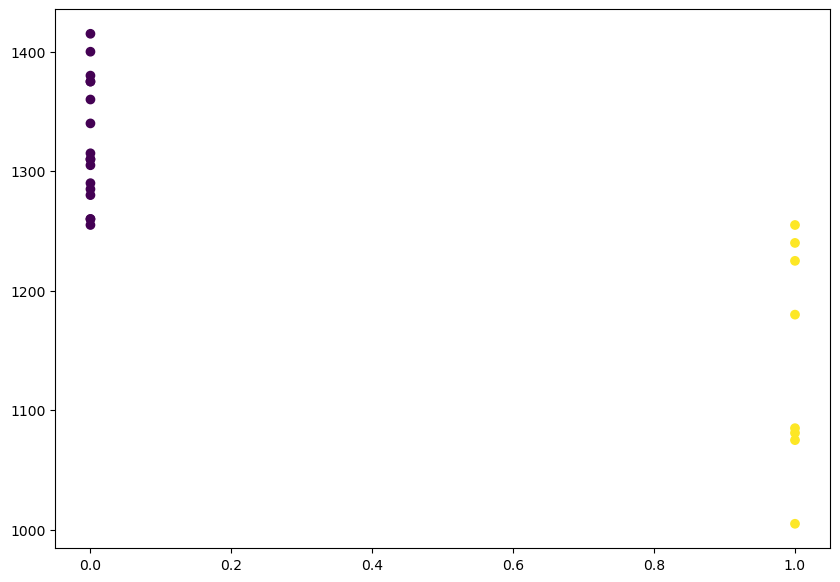

In [25]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(univ4['clusters4id'],univ4['SAT'], c=clusters4.labels_) 

### Build Cluster algorithm using K=3

In [14]:
# Cluster algorithm using K=3
clusters3=KMeans(3,random_state=42).fit(univ_norm)
clusters3

C:\Users\sidra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sidra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [15]:
clusters3.labels_

array([0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 1, 2, 1, 2, 1, 0, 2, 0, 2,
       1, 1, 2])

In [16]:
# Assign clusters to the data set
univ3=univ.copy()
univ3['clusters3id']=clusters3.labels_
univ3

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusters3id
0,Brown,1310,89,22,13,22704,94,0
1,CalTech,1415,100,25,6,63575,81,2
2,CMU,1260,62,59,9,25026,72,2
3,Columbia,1310,76,24,12,31510,88,2
4,Cornell,1280,83,33,13,21864,90,0
5,Dartmouth,1340,89,23,10,32162,95,2
6,Duke,1315,90,30,12,31585,95,2
7,Georgetown,1255,74,24,12,20126,92,0
8,Harvard,1400,91,14,11,39525,97,2
9,JohnsHopkins,1305,75,44,7,58691,87,2


In [17]:
# Compute the centroids for K=3 clusters with 6 variables
clusters3.cluster_centers_

array([[6.97772342e-02, 4.52559527e-03, 2.24130914e-03, 7.94542102e-04,
        9.97478703e-01, 4.93538672e-03],
       [1.04154971e-01, 4.29384696e-03, 6.37080088e-03, 1.79892035e-03,
        9.94428119e-01, 7.16777365e-03],
       [3.81314072e-02, 2.41988834e-03, 8.98489564e-04, 2.98809935e-04,
        9.99232220e-01, 2.57348899e-03]])

In [18]:
# Group data by Clusters (K=3)
univ3.groupby('clusters3id').agg(['mean']).reset_index()

C:\Users\sidra\AppData\Local\Temp\ipykernel_19152\1017780545.py:2: FutureWarning: ['Univ'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  univ3.groupby('clusters3id').agg(['mean']).reset_index()


,clusters3id,SAT,Top10,Accept,SFRatio,Expenses,GradRate
,,mean,mean,mean,mean,mean,mean
0,0,1253.333333,81.166667,38.166667,14.000000,18404.333333,88.833333
1,1,1094.200000,46.400000,64.800000,18.200000,10632.200000,75.800000
2,2,1333.571429,85.214286,30.500000,10.214286,37222.357143,89.714286


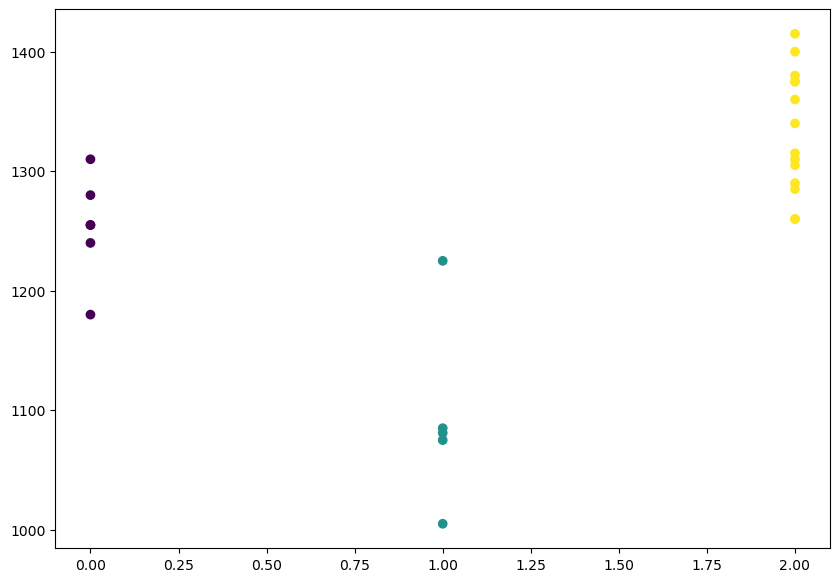

In [19]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(univ3['clusters3id'],univ3['SAT'], c=clusters3.labels_) 